In [32]:
train = pd.read_csv("/content/sample_data/train.csv")
test = pd.read_csv("/content/sample_data/test.csv")
features = pd.read_csv("/content/sample_data/features.csv")
stores = pd.read_csv("/content/sample_data/stores.csv")


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
!pip install streamlit
import streamlit as st
from prophet import Prophet

In [34]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [35]:
train.shape

(421570, 5)

In [36]:
test.info

<bound method DataFrame.info of         Store  Dept        Date  IsHoliday
0           1     1  2012-11-02      False
1           1     1  2012-11-09      False
2           1     1  2012-11-16      False
3           1     1  2012-11-23       True
4           1     1  2012-11-30      False
...       ...   ...         ...        ...
115059     45    98  2013-06-28      False
115060     45    98  2013-07-05      False
115061     45    98  2013-07-12      False
115062     45    98  2013-07-19      False
115063     45    98  2013-07-26      False

[115064 rows x 4 columns]>

In [37]:
features.describe

<bound method NDFrame.describe of       Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0         1  2010-02-05        42.31       2.572        NaN        NaN   
1         1  2010-02-12        38.51       2.548        NaN        NaN   
2         1  2010-02-19        39.93       2.514        NaN        NaN   
3         1  2010-02-26        46.63       2.561        NaN        NaN   
4         1  2010-03-05        46.50       2.625        NaN        NaN   
...     ...         ...          ...         ...        ...        ...   
8185     45  2013-06-28        76.05       3.639    4842.29     975.03   
8186     45  2013-07-05        77.50       3.614    9090.48    2268.58   
8187     45  2013-07-12        79.37       3.614    3789.94    1827.31   
8188     45  2013-07-19        82.84       3.737    2961.49    1047.07   
8189     45  2013-07-26        76.06       3.804     212.02     851.73   

      MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0           NaN        NaN        NaN  211.096358         8.106      False  
1           NaN        NaN        NaN  211.242170         8.106       True  
2           NaN        NaN        NaN  211.289143         8.106      False  
3           NaN        NaN        NaN  211.319643         8.106      False  
4           NaN        NaN        NaN  211.350143         8.106      False  
...         ...        ...        ...         ...           ...        ...  
8185       3.00    2449.97    3169.69         NaN           NaN      False  
8186     582.74    5797.47    1514.93         NaN           NaN      False  
8187      85.72     744.84    2150.36         NaN           NaN      False  
8188     204.19     363.00    1059.46         NaN           NaN      False  
8189       2.06      10.88    1864.57         NaN           NaN      False  

[8190 rows x 12 columns]>

In [40]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [39]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [49]:
stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [46]:
df = train.merge(
    features,
    on = ['Store','Date','IsHoliday'],
    how = 'left'
)

In [48]:
df = df.merge(
    stores,
    on = 'Store',
    how = 'left'
)

In [51]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


In [53]:
df['Date'] = pd.to_datetime(df['Date'])
markdown_cols = ['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']
df[markdown_cols] = df[markdown_cols].fillna(0)


In [56]:
df.to_csv("/content/sample_data/clean_walmart_data.csv", index=False)


In [59]:
df = pd.read_csv("/content/sample_data/clean_walmart_data.csv")
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,A,151315


In [60]:
df.shape

(421570, 16)

In [61]:
df.isnull().sum()

,0
Store,0
Dept,0
Date,0
Weekly_Sales,0
IsHoliday,0
Temperature,0
Fuel_Price,0
MarkDown1,0
MarkDown2,0
MarkDown3,0


In [62]:
df.describe

<bound method NDFrame.describe of         Store  Dept       Date  Weekly_Sales  IsHoliday  Temperature  \
0           1     1 2010-02-05      24924.50      False        42.31   
1           1     1 2010-02-12      46039.49       True        38.51   
2           1     1 2010-02-19      41595.55      False        39.93   
3           1     1 2010-02-26      19403.54      False        46.63   
4           1     1 2010-03-05      21827.90      False        46.50   
...       ...   ...        ...           ...        ...          ...   
421565     45    98 2012-09-28        508.37      False        64.88   
421566     45    98 2012-10-05        628.10      False        64.89   
421567     45    98 2012-10-12       1061.02      False        54.47   
421568     45    98 2012-10-19        760.01      False        56.47   
421569     45    98 2012-10-26       1076.80      False        58.85   

        Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5  \
0            2.572       0.00       0.00       0.00       0.00       0.00   
1            2.548       0.00       0.00       0.00       0.00       0.00   
2            2.514       0.00       0.00       0.00       0.00       0.00   
3            2.561       0.00       0.00       0.00       0.00       0.00   
4            2.625       0.00       0.00       0.00       0.00       0.00   
...            ...        ...        ...        ...        ...        ...   
421565       3.997    4556.61      20.64       1.50    1601.01    3288.25   
421566       3.985    5046.74       0.00      18.82    2253.43    2340.01   
421567       4.000    1956.28       0.00       7.89     599.32    3990.54   
421568       3.969    2004.02       0.00       3.18     437.73    1537.49   
421569       3.882    4018.91      58.08     100.00     211.94     858.33   

               CPI  Unemployment Type    Size  
0       211.096358         8.106    A  151315  
1       211.242170         8.106    A  151315  
2       211.289143         8.106    A  151315  
3       211.319643         8.106    A  151315  
4       211.350143         8.106    A  151315  
...            ...           ...  ...     ...  
421565  192.013558         8.684    B  118221  
421566  192.170412         8.667    B  118221  
421567  192.327265         8.667    B  118221  
421568  192.330854         8.667    B  118221  
421569  192.308899         8.667    B  118221  

[421570 rows x 16 columns]>

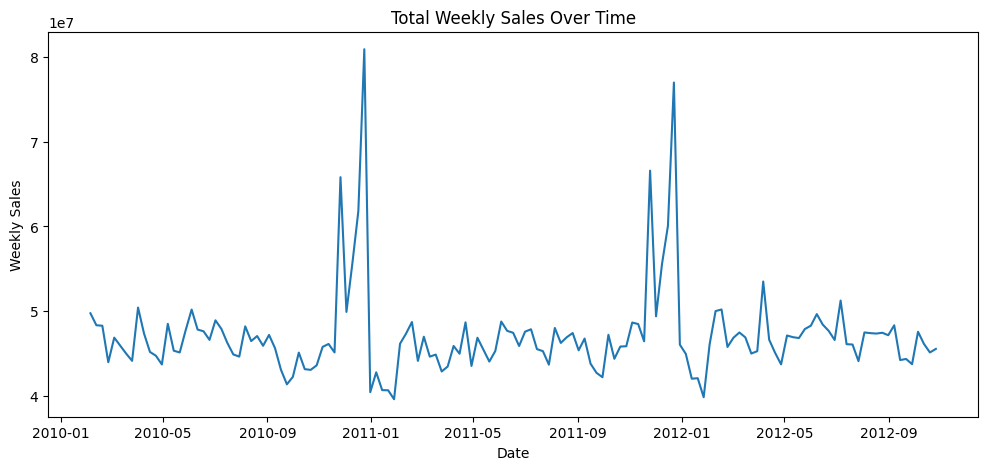

In [64]:
weekly_sales = df.groupby('Date')['Weekly_Sales'].sum()
plt.figure(figsize=(12,5))
plt.plot(weekly_sales)
plt.title("Total Weekly Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.show()


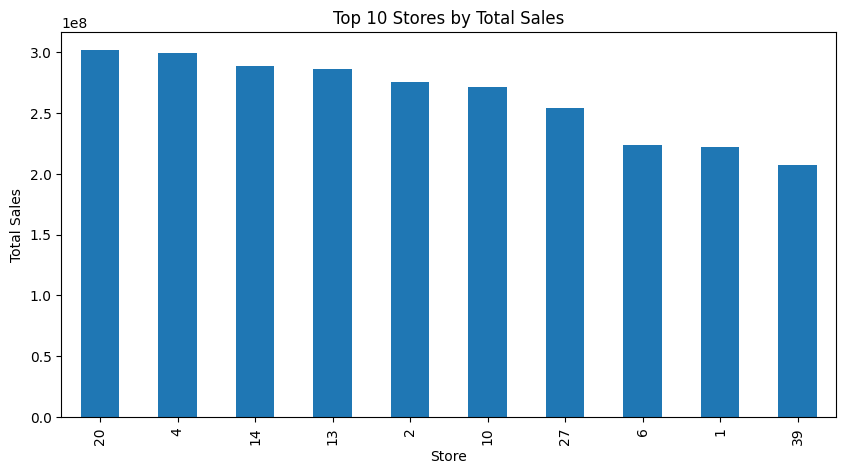

In [66]:
store_sales = df.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(10,5))
store_sales.head(10).plot(kind='bar')
plt.title("Top 10 Stores by Total Sales")
plt.xlabel("Store")
plt.ylabel("Total Sales")
plt.show()


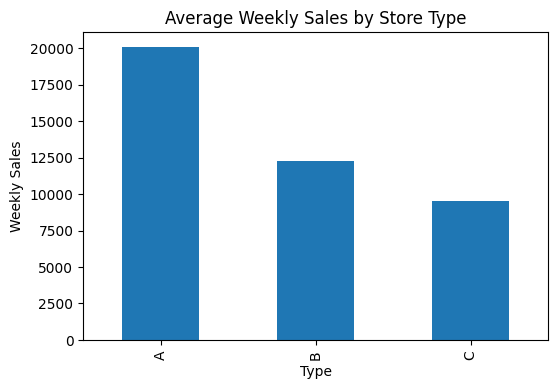

In [67]:
type_sales = df.groupby('Type')['Weekly_Sales'].mean()
type_sales.plot(kind='bar', figsize=(6,4))
plt.title("Average Weekly Sales by Store Type")
plt.ylabel("Weekly Sales")
plt.show()


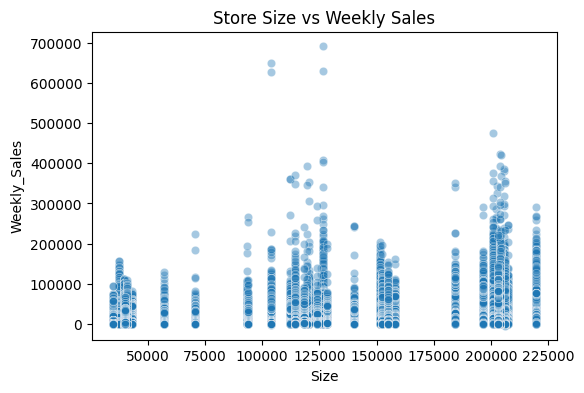

In [68]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='Size', y='Weekly_Sales', data=df, alpha=0.4)
plt.title("Store Size vs Weekly Sales")
plt.show()


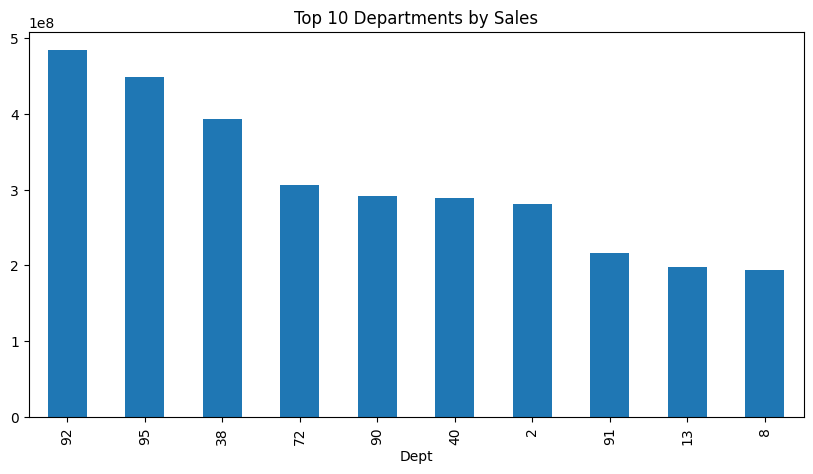

In [69]:
dept_sales = df.groupby('Dept')['Weekly_Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(10,5))
dept_sales.head(10).plot(kind='bar')
plt.title("Top 10 Departments by Sales")
plt.show()


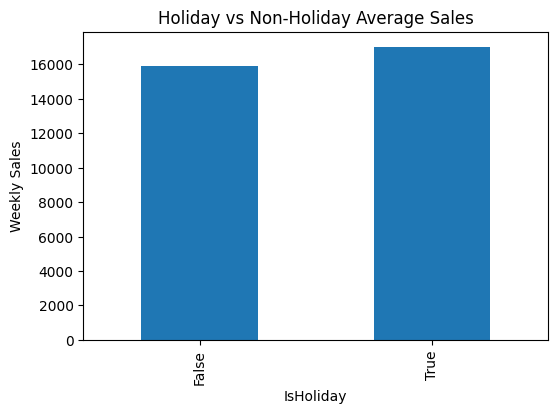

In [70]:
holiday_sales = df.groupby('IsHoliday')['Weekly_Sales'].mean()
holiday_sales.plot(kind='bar', figsize=(6,4))
plt.title("Holiday vs Non-Holiday Average Sales")
plt.ylabel("Weekly Sales")
plt.show()


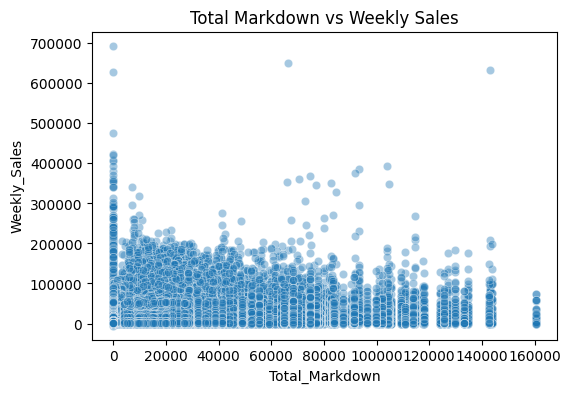

In [71]:
markdown_cols = ['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']

df['Total_Markdown'] = df[markdown_cols].sum(axis=1)
plt.figure(figsize=(6,4))
sns.scatterplot(x='Total_Markdown', y='Weekly_Sales', data=df, alpha=0.4)
plt.title("Total Markdown vs Weekly Sales")
plt.show()


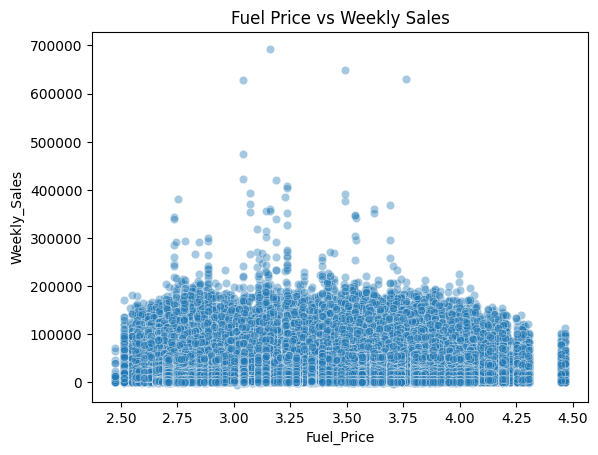

In [72]:
sns.scatterplot(x='Fuel_Price', y='Weekly_Sales', data=df, alpha=0.4)
plt.title("Fuel Price vs Weekly Sales")
plt.show()


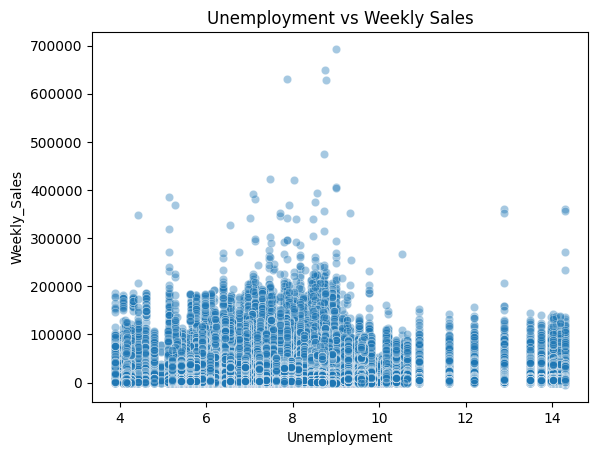

In [73]:
sns.scatterplot(x='Unemployment', y='Weekly_Sales', data=df, alpha=0.4)
plt.title("Unemployment vs Weekly Sales")
plt.show()


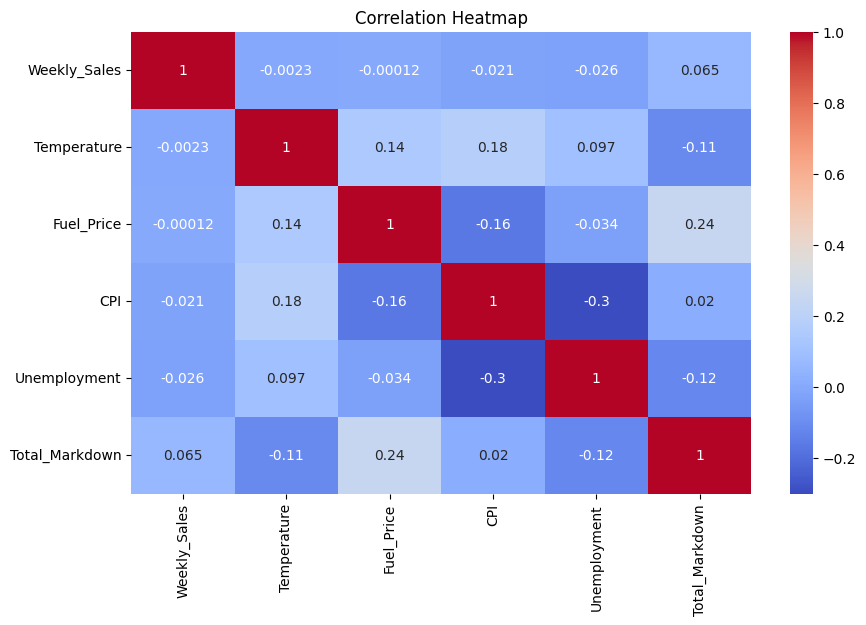

In [74]:
plt.figure(figsize=(10,6))
sns.heatmap(
    df[['Weekly_Sales','Temperature','Fuel_Price','CPI','Unemployment','Total_Markdown']].corr(),
    annot=True,
    cmap='coolwarm'
)
plt.title("Correlation Heatmap")
plt.show()
